In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 22.4MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,370 kB]

In [ ]:
from selenium import webdriver
import time
import os
import requests

keyword = 'Anime'
url = 'https://www.google.com.hk/search?q='+keyword+'&tbm=isch'


class Crawler_google_images:
    def __init__(self):
        self.url = url

    def init_browser(self):
        chrome_options = webdriver.ChromeOptions()
        chrome_options.add_argument('--headless')
        chrome_options.add_argument('--no-sandbox')
        chrome_options.add_argument('--disable-dev-shm-usage')
        browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
        browser.get(self.url)
        browser.maximize_window()
        return browser

    def download_images(self, browser,round=2):
        picpath = './ch'
        if not os.path.exists(picpath): os.makedirs(picpath)
        img_url_dic = []

        count = 0 
        pos = 0
        for i in range(round):
            pos += 500
            js = 'var q=document.documentElement.scrollTop=' + str(pos)
            browser.execute_script(js)
            time.sleep(1)

            img_elements = browser.find_elements_by_tag_name('img')
            for img_element in img_elements:
                img_url = img_element.get_attribute('src')
                if isinstance(img_url, str):
                    if len(img_url) <= 200:
                        if 'images' in img_url:
                            if img_url not in img_url_dic:
                                try:
                                    img_url_dic.append(img_url)
                                    filename = "./ch/" + str(count) + ".jpg"
                                    r = requests.get(img_url)
                                    with open(filename, 'wb') as f:
                                        f.write(r.content)
                                    f.close()
                                    count += 1
                                    print('this is '+str(count)+'st img')
                                    time.sleep(0.2)
                                except:
                                    print('failure')

    def run(self):
        self.__init__()
        browser = self.init_browser()
        self.download_images(browser,200)
        browser.close()
        print("all down")


if __name__ == '__main__':
    craw = Crawler_google_images()
    craw.run()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: use options instead of chrome_options


this is 1st img
this is 2st img
this is 3st img
this is 4st img
this is 5st img
this is 6st img
this is 7st img
this is 8st img
this is 9st img
this is 10st img
this is 11st img
this is 12st img
this is 13st img
this is 14st img
this is 15st img
this is 16st img
this is 17st img
this is 18st img
this is 19st img
this is 20st img
this is 21st img
this is 22st img
this is 23st img
this is 24st img
this is 25st img
this is 26st img
this is 27st img
this is 28st img
this is 29st img
this is 30st img
this is 31st img
this is 32st img
this is 33st img
this is 34st img
this is 35st img
this is 36st img
this is 37st img
this is 38st img
this is 39st img
this is 40st img
this is 41st img
this is 42st img
this is 43st img
this is 44st img
this is 45st img
this is 46st img
this is 47st img
this is 48st img
this is 49st img
this is 50st img
this is 51st img
this is 52st img
this is 53st img
this is 54st img
this is 55st img
this is 56st img
this is 57st img
this is 58st img
this is 59st img
this i

ProtocolError: ignored

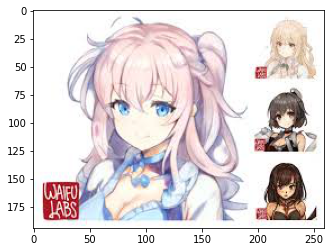

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
img_example = ('/content/ch/0.jpg')

plt.imshow(imread(img_example))
plt.show()

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml

--2020-12-05 02:41:50--  https://raw.githubusercontent.com/nagadomi/lbpcascade_animeface/master/lbpcascade_animeface.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 246945 (241K) [text/plain]
Saving to: ‘lbpcascade_animeface.xml’

lbpcascade_animefac 100%[===================>] 241.16K  --.-KB/s    in 0.006s  

2020-12-05 02:41:50 (40.0 MB/s) - ‘lbpcascade_animeface.xml’ saved [246945/246945]



In [ ]:
import cv2
import sys
import os.path
from glob import glob

path1 = "/content/ch"
for path, _, fnames in os.walk(path1):
    for fname in fnames:
        if not fname.endswith('.jpg'):
            continue
        filename = os.path.join(path,fname)
#OK

def detect(filename,cascade_file="lbpcascade_animeface.xml"):
    if not os.path.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)

    faces = cascade.detectMultiScale(
        gray,
        # detector options
        scaleFactor = 1.1,
        minNeighbors = 5,
        minSize = (48,48)
    )

    for i,(x,y,w,h) in enumerate(faces):
        face = image[y: y+h, x:x+w, :]
        face = cv2.resize(face,(96,96))
        save_filename = '%s.jpg' % (os.path.basename(filename).split('.')[0])
        cv2.imwrite("faces/"+save_filename,face)

if __name__ == '__main__':

    if os.path.exists('faces') is False:
        os.makedirs('faces')
    file_list = glob('ch/*.jpg')
    for filename in file_list:
        detect(filename)

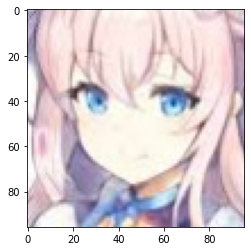

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
img_example2 = ('/content/faces/0.jpg')

plt.imshow(imread(img_example2))
plt.show()